In [ ]:
Installation of dependencies

In [13]:
%pip install pandas
%pip install plotly
%pip install SQLAlchemy==1.4.46
%pip install nbformat
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



In [ ]:
Import modules

In [3]:
import requests
import pandas as pd
from io import StringIO
import sqlite3
import os

accident_figures = "https://opendata.muenchen.de/dataset/5e73a82b-7cfb-40cc-9b30-45fe5a3fa24e/resource/40094bd6-f82d-4979-949b-26c8dc00b9a7/download/monatszahlen2307_verkehrsunfaelle_10_07_23_nosum.csv"
weather_figures = "https://opendata.muenchen.de/dataset/d7e42935-8884-40d3-9284-096d9cafecdd/resource/64c8c183-7fd0-4b29-9958-4169d22ee883/download/monatszahlen2307_witterung_10_07_23_nosum.csv"

accident_response = requests.get(accident_figures)
weather_response= requests.get(weather_figures)

accident_data = accident_response.text
weather_data = weather_response.text

accident_df = pd.read_csv(StringIO(accident_data))

weather_df = pd.read_csv(StringIO(weather_data))

In [ ]:
Pre-processing of Accident data

In [4]:
accident_df=accident_df.drop(accident_df.iloc[:, [0, 1]], axis=1)
accident_df=accident_df.rename(columns={"JAHR":"Year","MONAT":"Month",
                       "WERT":"value","VORJAHRESWERT":"Previous_year",
                       "VERAEND_VORMONAT_PROZENT":"Previous_month_percent",
                       "VERAEND_VORJAHRESMONAT_PROZENT":"previous_year",
                       "ZWOELF_MONATE_MITTELWERT":"tweleve_month_average"})
accident_df=accident_df.dropna()
accident_df=accident_df.reset_index()
accident_df.Month=accident_df.Month.str[4:]
acc_df = accident_df[['Year', 'Month']].drop_duplicates()
acc_df['number_of_accidents']=accident_df["value"]
accident_df=acc_df
accident_df


,Year,Month,number_of_accidents
0,2022,01,19.0
1,2022,02,32.0
2,2022,03,28.0
3,2022,04,34.0
4,2022,05,57.0
...,...,...,...
259,2001,08,60.0
260,2001,09,107.0
261,2001,10,77.0
262,2001,11,68.0


In [ ]:
Pre-processing of Weather data

In [5]:
weather_df=weather_df.drop(weather_df.iloc[:, [1]], axis=1)

weather_df=weather_df.rename(columns={"MONATSZAHL":"TYPE","JAHR":"Year","MONAT":"Month",
                       "WERT":"value","VORJAHRESWERT":"Previous_year",
                       "VERAEND_VORMONAT_PROZENT":"Previous_month_percent",
                       "VERAEND_VORJAHRESMONAT_PROZENT":"previous_year",
                       "ZWOELF_MONATE_MITTELWERT":"tweleve_month_average"})
weather_df.Month=weather_df.Month.str[4:]

for i,row in weather_df.iterrows():
    if weather_df.TYPE[i]=="Luftfeuchtigkeit":
        weather_df.TYPE[i]="Humidity"
    elif weather_df.TYPE[i]=="Lufttemperatur":
        weather_df.TYPE[i]="Air_Temperature"
    elif weather_df.TYPE[i]=="Niederschlag":
        weather_df.TYPE[i]="Precipitation"
    else:
        weather_df.TYPE[i]="Sunshine"

C:\Users\Impana\AppData\Local\Temp\ipykernel_16652\3877102994.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df.TYPE[i]="Humidity"
C:\Users\Impana\AppData\Local\Temp\ipykernel_16652\3877102994.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df.TYPE[i]="Humidity"
C:\Users\Impana\AppData\Local\Temp\ipykernel_16652\3877102994.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df.TYPE[i]="Humidity"
C:\U

In [6]:
Humidity = weather_df.loc[weather_df.TYPE=='Humidity']
Sunshine = weather_df.loc[weather_df.TYPE=='Sunshine']
Air_Temperature = weather_df.loc[weather_df.TYPE=='Air_Temperature']
Precipitation = weather_df.loc[weather_df.TYPE=='Precipitation']

In [7]:
Humidity=Humidity.iloc[:, [1,2,3]]
Sunshine=Sunshine.iloc[:, [1,2,3]]
Precipitation=Precipitation.iloc[:, [1,2,3]]
Air_Temperature=Air_Temperature.iloc[:, [1,2,3]]
Humidity=Humidity.rename(columns={"value":"Humidity_value"})
Precipitation=Precipitation.rename(columns={"value":"Precipitation_value"})
Air_Teperature=Air_Temperature.rename(columns={"value":"Air_temp_value"})
Sunshine=Sunshine.rename(columns={"value":"Sunshine_value"})

In [8]:
weather = pd.merge(Humidity, Precipitation, on=['Year', 'Month'])
weather = pd.merge(weather, Air_Teperature, on=['Year', 'Month'])
weather = pd.merge(weather,Sunshine, on=['Year', 'Month'])
weather_unique = weather[['Year', 'Month']].drop_duplicates()
result_df = pd.DataFrame(weather_unique)
result_df['Humidity'] = weather['Humidity_value']
result_df['Precipitation'] = weather['Precipitation_value']
result_df['Air_Temperature'] = weather['Air_temp_value']
result_df['Sunshine'] = weather['Sunshine_value']
weather_df=result_df
weather_df=weather_df.reset_index(drop=True)

In [ ]:
Merging both Weather and Accident data

In [9]:
table=pd.merge(weather_df, accident_df, on=['Year', 'Month'])
table

,Year,Month,Humidity,Precipitation,Air_Temperature,Sunshine,number_of_accidents
0,2022,01,78.0,34.0,16.5,91.0,19.0
1,2022,02,66.0,31.0,15.5,128.0,32.0
2,2022,03,53.0,16.0,20.4,259.0,28.0
3,2022,04,66.0,54.0,22.7,203.0,34.0
4,2022,05,67.0,122.0,31.9,256.0,57.0
...,...,...,...,...,...,...,...
259,2001,08,73.0,136.0,32.1,254.0,60.0
260,2001,09,87.0,124.0,22.9,76.0,107.0
261,2001,10,84.0,42.0,27.8,183.0,77.0
262,2001,11,91.0,98.0,14.1,69.0,68.0


In [22]:
import matplotlib.pyplot as plt
new=table.groupby('Month', as_index=False)
table2=new.sum()
table2
table_df=table2
table_df

,Month,Year,Humidity,Precipitation,Air_Temperature,Sunshine,number_of_accidents
0,01,44253,1767.0,1316.0,287.3,1614.0,662.0
1,02,44253,1649.0,1033.0,336.0,2187.0,665.0
2,03,44253,1509.0,1188.0,442.7,3506.0,739.0
3,04,44253,1391.0,1172.0,543.7,4403.0,811.0
4,05,44253,1503.0,2480.0,636.3,4622.0,1031.0
5,06,44253,1478.0,2835.0,709.3,5253.0,1051.0
6,07,44253,1447.0,2435.0,738.7,5540.0,1197.0
7,08,44253,1520.0,2647.0,721.3,5109.0,994.0
8,09,44253,1667.0,1712.0,614.7,3807.0,1237.0
9,10,44253,1755.0,1419.0,539.7,2915.0,992.0


In [ ]:
Data exploration using graphs

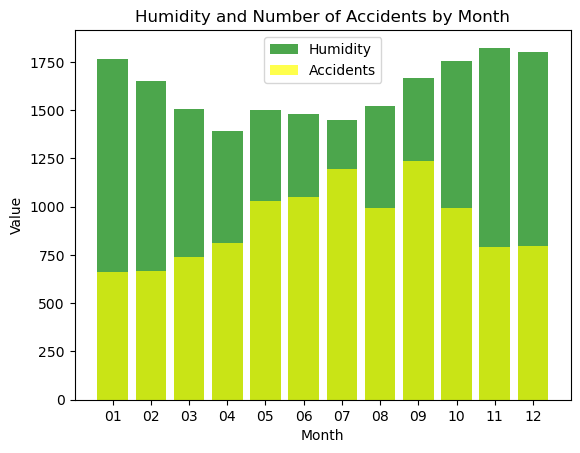

In [11]:
plt.bar(table2['Month'], table2['Humidity'], color='green', alpha=0.7, label='Humidity')
plt.bar(table2['Month'], table2['number_of_accidents'], color='yellow', alpha=0.7, label='Accidents')
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Humidity and Number of Accidents by Month')
plt.legend()
plt.show()

In [12]:
yea=table.groupby('Year', as_index=False)
year_df=yea.sum()
year_df

,Year,Month,Humidity,Precipitation,Air_Temperature,Sunshine,number_of_accidents
0,2001,010203040506070809101112,952.0,1053.0,271.3,1829.0,848.0
1,2002,010203040506070809101112,905.0,1127.0,278.1,1856.0,803.0
2,2003,010203040506070809101112,810.0,657.0,287.7,2172.0,730.0
3,2004,010203040506070809101112,869.0,814.0,275.2,1784.0,659.0
4,2005,010203040506070809101112,901.0,1017.0,273.8,1901.0,600.0
5,2006,010203040506070809101112,895.0,855.0,273.1,1997.0,599.0
6,2007,010203040506070809101112,876.0,1072.0,275.8,1988.0,560.0
7,2008,010203040506070809101112,889.0,860.0,287.4,1907.0,482.0
8,2009,010203040506070809101112,894.0,918.0,276.3,1798.0,430.0
9,2010,010203040506070809101112,900.0,1018.0,277.9,1634.0,402.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


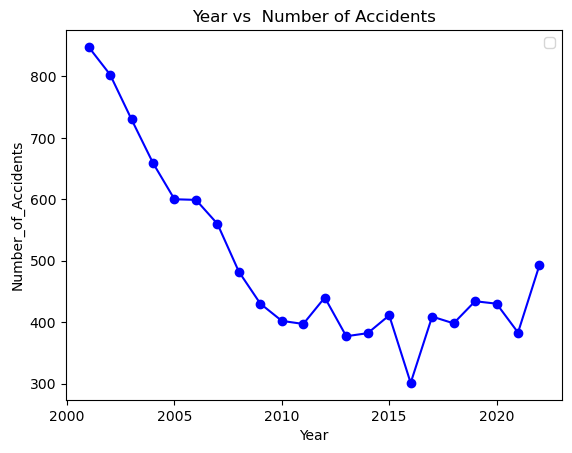

In [13]:
plt.plot(year_df['Year'], year_df["number_of_accidents"], marker='o', linestyle='-', color='blue')
plt.xlabel('Year')
plt.ylabel('Number_of_Accidents')
plt.title('Year vs  Number of Accidents')
plt.legend()
plt.show()

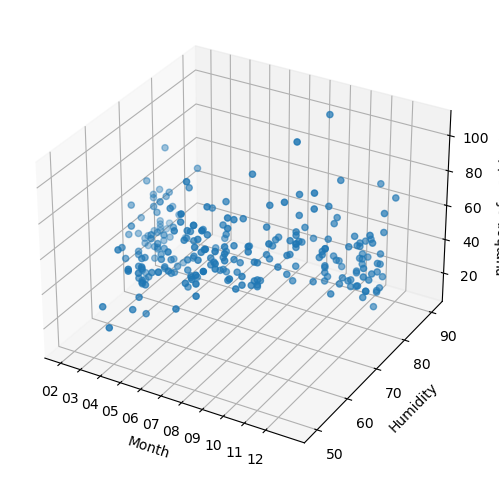

In [16]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(table['Month'], table['Humidity'], table['number_of_accidents'])

ax.set_xlabel('Month')
ax.set_ylabel('Humidity')
ax.set_zlabel('number_of_accidents')

plt.show()

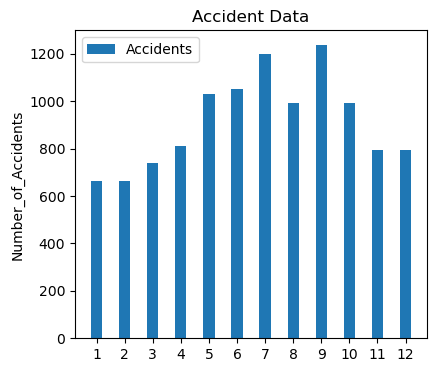

In [60]:
import numpy as np
table_df.sort_index(ascending=True, inplace=True)
X = table_df.index+1
X_axis = np.arange(len(X))

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)

plt.bar(X_axis, table_df['number_of_accidents'], 0.4, label='Accidents')
plt.legend()
plt.title('Accident Data')
plt.ylabel('Number_of_Accidents')
plt.xticks(X_axis, X)


plt.show()

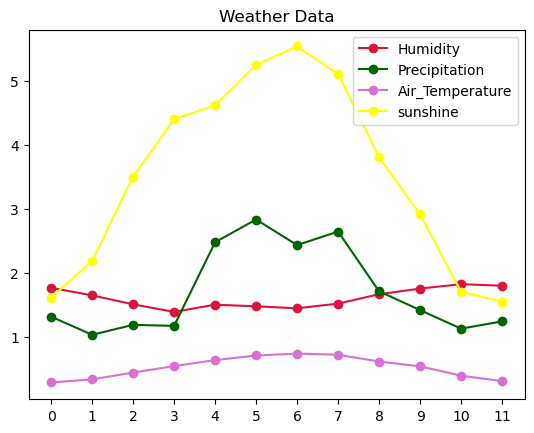

In [36]:
plt.subplot(1, 1, 1)
plt.plot(X_axis, table_df['Humidity']/1000, 'o-', label='Humidity', color="Crimson")
plt.plot(X_axis, table_df['Precipitation']/1000, 'o-', label='Precipitation', color="Darkgreen")
plt.plot(X_axis, table_df['Air_Temperature']/1000, 'o-', label='Air_Temperature', color="Orchid")
plt.plot(X_axis, table_df['Sunshine']/1000, 'o-', label='sunshine', color="Yellow")
plt.legend()
plt.title('Weather Data')
plt.xticks(X_axis, X)
plt.ylabel('')
plt.show()

In [ ]:
Calculating Correlation Matrix

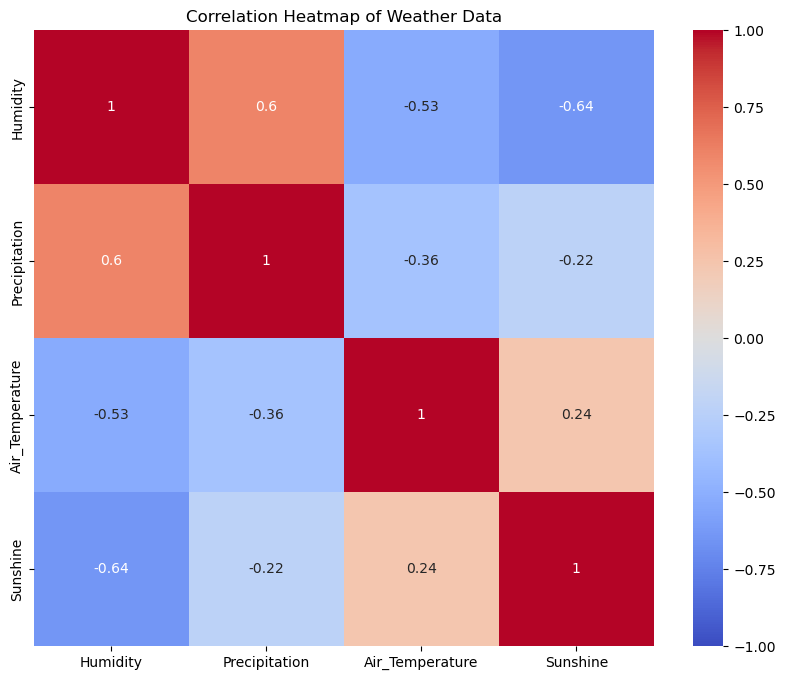

In [15]:
import seaborn as sns
selected_columns = ["Humidity","Precipitation","Air_Temperature","Sunshine"]
correlation=year_df[selected_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Weather Data')
plt.show()

In [ ]:
Calculating Pearson and Spearman correlation

In [64]:
from scipy.stats import pearsonr, spearmanr

# Calculate Pearson correlation
pearson_corr_hum, _ = pearsonr(table_df['number_of_accidents'], table_df['Humidity'])
pearson_corr_pre, _ = pearsonr(table_df['number_of_accidents'], table_df['Precipitation'])
pearson_corr_air, _ = pearsonr(table_df['number_of_accidents'], table_df['Air_Temperature'])
pearson_corr_sun, _ = pearsonr(table_df['number_of_accidents'], table_df['Sunshine'])

# Calculate Spearman correlation
spearman_corr_hum, _ = spearmanr(table_df['number_of_accidents'], table_df['Humidity'])
spearman_corr_pre, _ = spearmanr(table_df['number_of_accidents'], table_df['Precipitation'])
spearman_corr_air, _ = spearmanr(table_df['number_of_accidents'], table_df['Air_Temperature'])
spearman_corr_sun, _ = spearmanr(table_df['number_of_accidents'], table_df['Sunshine'])

# Print the results
print(f"Pearson Correlation: {pearson_corr_hum, pearson_corr_pre, pearson_corr_air, pearson_corr_sun}")
print(f"Spearman Correlation: {spearman_corr_hum, spearman_corr_pre, spearman_corr_air, spearman_corr_sun}")


Pearson Correlation: (-0.3396796871368906, 0.7098640931282802, 0.8525866669633674, 0.7069217592170773)
Spearman Correlation: (-0.44755244755244755, 0.7412587412587414, 0.8531468531468532, 0.7552447552447553)
